In [1]:
# read json from url and print the data
import json
import urllib.request
import urllib.parse
import urllib.error
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading URL and retreiving data
url = "https://pollysnips.s3.amazonaws.com/bostonEmployeeSalaries.json"
uh = urllib.request.urlopen(url)
data = uh.read().decode()
print('Retrieved', len(data), 'characters')

Retrieved 5814998 characters


In [3]:
# create dictionary from data string
info = json.loads(data)
newData = info["data"]
print(newData[1][18])

84167.21


In [4]:
# creating pandas dataframe
df = pd.DataFrame(newData)
salary = df[18].astype(float)
print(df.head())

   0                                     1   2           3       4   \
0   1  17439B12-1A55-4B6A-980E-5BAC15841AC4   1  1426008064  525314   
1   2  EA2E2977-1FBA-4254-A2A9-855FA012565E   2  1426008064  525314   
2   3  08FF3561-CE31-4BEB-AFD8-6DC47AC3C557   3  1426008064  525314   
3   4  AE0A5BEF-F80F-4BD6-938C-37A639AB5400   4  1426008064  525314   
4   5  72AD83C0-C652-4580-B9C3-F7304CB396A4   5  1426008064  525314   

           5       6     7                          8   \
0  1426008064  525314  {\n}           Adario,Anthony J   
1  1426008064  525314  {\n}         Baker,Katherine E.   
2  1426008064  525314  {\n}             Braga,Ann Hess   
3  1426008064  525314  {\n}       Calobrisi,Jane Ellen   
4  1426008064  525314  {\n}  Castillo-Cook,Wendolyn M.   

                              9                    10        11    12  \
0   Supvising Claims Agent (Asd)  ASD Human Resources  98538.32  0.00   
1             Nurse Case Manager  ASD Human Resources  83942.21  0.00   
2  Hu

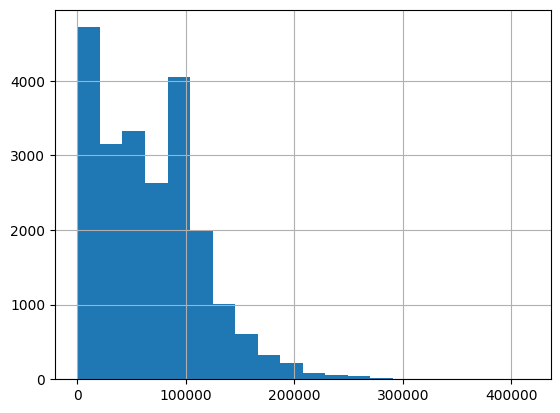

In [18]:
# plotting histogram of salaries with 20 bins
salary.hist(bins = 20)

# print total salary of all employees
total_salary = salary.sum()

([<matplotlib.patches.Wedge at 0x7f4676135250>,
 [Text(0.7128166035850354, 0.8377902420376444, 'Teachers'),
  Text(-0.3799561151353299, 1.0322951857735596, 'Firefighters'),
  Text(-0.8484261813924334, 0.7001235710414654, 'Police'),
  Text(-0.19344715112386754, -1.0828565000599386, 'Other')],
 [Text(0.38880905650092834, 0.4569764956568969, '27.56%'),
  Text(-0.20724879007381627, 0.5630701013310325, '6.11%'),
  Text(-0.4627779171231454, 0.38188558420443564, '10.71%'),
  Text(-0.10551662788574592, -0.5906490000326937, '55.63%')])

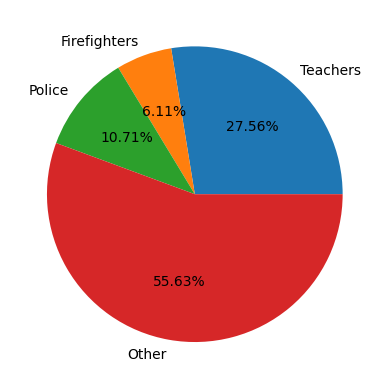

In [19]:
# print total salary of all teachers, firefighters, police, other professions
salary_teacher = salary[df[9] == "Teacher"].sum()
salary_firefighter = salary[df[9] == "Fire Fighter"].sum()
salary_police = salary[df[9] == "Police Officer"].sum()
salary_other = total_salary - salary_teacher - salary_firefighter - salary_police

# plot pie chart of teacher, firefighter, police, and other salaries
plt.pie([salary_teacher, salary_firefighter, salary_police, salary_other], labels = ["Teachers", "Firefighters", "Police", "Other"], autopct = "%.2f%%")


In [15]:
# listing job categories
jobCategory = df[9].astype(str)
#print(jobCategory.value_counts())

# print out number of people in each job category with a salary greater than 200,000
salary200 = df[df[18].astype(float) > 200000]
print(salary200[9].value_counts())


Police Sergeant (Det)             51
Police Officer                    36
Police Sergeant                   31
Police Lieutenant                 29
Police Lieutenant (Det)           18
Police Captain/DDC                16
Dep Fire Chief                     8
Dep Fire Chief Administration      7
District Fire Chief-Technician     7
Dist Fire Chief                    6
Police Offc Comm Serv Offc 3$8     5
Police Sergeant/CHF RADIO DISP     5
Dep Supn (Bpd)                     4
Police Sergeant/Mobile Oper        4
Supn Bpd                           3
Police Captain (Det)               3
Police Lieutenant/Hdq Dispatch     3
Police Sergeant/Comm Serv Offc     3
Police Captain                     2
Fire Captain Admin-ADR             2
District Fire Chief Admin          2
Sergeant/Harbor Patrol             2
Police Lieut/Acad Instr            2
Police Offc Mobile Offc 2$6        2
Police Sergeant/FgrPrt Ev Tech     2
Police Sergeant/Bomb Squad         2
PoliceSergeant/SupvCourtCases      2
E

In [17]:
# print total number of people who make less than 100,000
salary100 = df[df[18].astype(float) < 100000]
print(len(salary100))

17070


<Axes: >

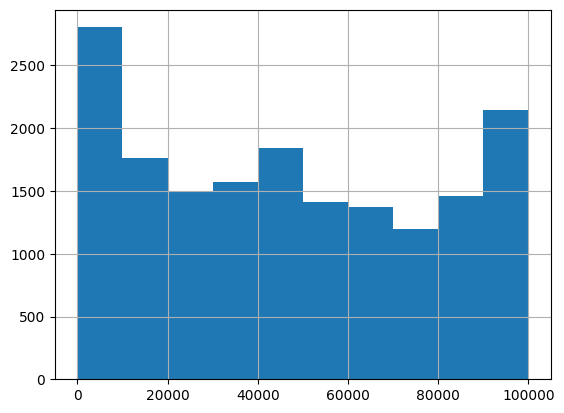

In [20]:
# make histogram of salaries under 100,000 with 10 bins
salary100[18].astype(float).hist(bins = 10)

<Axes: >

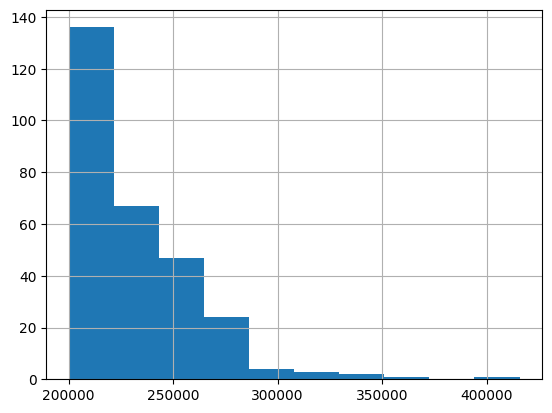

In [21]:
# make histogram of salaries over 200,000 with 10 bins
salary200[18].astype(float).hist(bins = 10)